In [1]:
#Import data


import pandas as pd
import hvplot.pandas
from MCForecastTools import MCSimulation
import matplotlib as plt
%matplotlib inline
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import pandas_datareader as pdr
import holoviews as hv
from datetime import timedelta
from pathlib import Path
import seaborn as sns
import pandas_montecarlo
import alpaca_trade_api as tradeapi

 

In [2]:
#Sheldon Whitehouse Republican

tickers = ['AAPL', 'FB', 'GILD', 'NSRGY', 'T', 'BIIB', 'MCHP', 'NFLX','IBM', 'V',]
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [3]:
sheldon_df = data.dropna()
sheldon_df

Symbols           AAPL          FB       GILD       NSRGY          T  \
Date                                                                   
2021-08-04  146.115204  358.920013  66.178734  122.628349  19.421373   
2021-08-05  146.224579  362.970001  66.236076  121.729546  19.484135   
2021-08-06  145.527527  363.510010  65.739075  120.606041  19.498083   
2021-08-09  145.477722  361.609985  65.433220  120.654892  19.421373   
2021-08-10  144.989792  361.130005  66.178734  120.752586  19.588739   
...                ...         ...        ...         ...        ...   
2022-07-20  153.039993  183.089996  61.549999  116.750000  20.480000   
2022-07-21  155.350006  183.169998  61.009998  119.129997  18.920000   
2022-07-22  154.089996  169.270004  60.799999  120.430000  18.400000   
2022-07-25  152.949997  166.649994  60.750000  121.269997  18.530001   
2022-07-26  151.600006  159.149994  60.619999  121.980003  18.299999   

Symbols           BIIB       MCHP        NFLX         IBM           V  
Date                                                                   
2021-08-04  338.100006  72.759216  517.349976  129.990005  235.100220  
2021-08-05  336.589996  73.878899  524.890015  129.999100  238.616745  
2021-08-06  340.000000  73.854233  520.549988  131.201019  239.798843  
2021-08-09  340.200012  73.740784  519.969971  130.095779  238.408142  
2021-08-10  337.220001  74.234039  515.840027  130.215500  236.490936  
...                ...        ...         ...         ...         ...  
2022-07-20  207.490005  65.550003  216.440002  129.179993  213.369995  
2022-07-21  214.059998  66.199997  223.880005  127.150002  216.190002  
2022-07-22  206.250000  64.720001  220.440002  128.250000  213.699997  
2022-07-25  207.570007  64.599998  218.509995  128.539993  214.270004  
2022-07-26  210.850006  63.490002  213.910004  128.080002  212.490005  

[246 rows x 10 columns]

In [4]:
sheldon_returns = sheldon_df.pct_change().dropna()
sheldon_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-05  0.000749  0.011284  0.000866 -0.007329  0.003232 -0.004466   
2021-08-06 -0.004767  0.001488 -0.007503 -0.009230  0.000716  0.010131   
2021-08-09 -0.000342 -0.005227 -0.004653  0.000405 -0.003934  0.000588   
2021-08-10 -0.003354 -0.001327  0.011394  0.000810  0.008618 -0.008760   
2021-08-11  0.001786 -0.003240  0.008665 -0.001214  0.002492  0.005427   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  0.013510  0.041586 -0.009176 -0.018495 -0.015385 -0.057977   
2022-07-21  0.015094  0.000437 -0.008773  0.020385 -0.076172  0.031664   
2022-07-22 -0.008111 -0.075886 -0.003442  0.010912 -0.027484 -0.036485   
2022-07-25 -0.007398 -0.015478 -0.000822  0.006975  0.007065  0.006400   
2022-07-26 -0.008826 -0.045005 -0.002140  0.005855 -0.012412  0.015802   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-05  0.015389  0.014574  0.000070  0.014958  
2021-08-06 -0.000334 -0.008268  0.009246  0.004954  
2021-08-09 -0.001536 -0.001114 -0.008424 -0.005799  
2021-08-10  0.006689 -0.007943  0.000920 -0.008042  
2021-08-11 -0.000199 -0.006669  0.005305 -0.012643  
...              ...       ...       ...       ...  
2022-07-20  0.015964  0.073451 -0.012989 -0.001357  
2022-07-21  0.009916  0.034374 -0.015714  0.013217  
2022-07-22 -0.022356 -0.015365  0.008651 -0.011518  
2022-07-25 -0.001854 -0.008755  0.002261  0.002667  
2022-07-26 -0.017183 -0.021052 -0.003579 -0.008307  

[245 rows x 10 columns]

In [5]:
trading_days = 252

In [6]:
one_year_avg_sheldon_return = sheldon_df.mean() * trading_days
one_year_avg_sheldon_return.dropna()


Symbols
AAPL      39380.548145
FB        68109.843123
GILD      16174.775374
NSRGY     31305.508549
T          4705.242955
BIIB      60894.376014
MCHP      18480.137443
NFLX     109450.913977
IBM       32390.997592
V         54035.912672
dtype: float64

In [7]:
sheldon_cummulative_returns = (1 + sheldon_returns).cumprod()
sheldon_cummulative_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-05  1.000749  1.011284  1.000866  0.992671  1.003232  0.995534   
2021-08-06  0.995978  1.012788  0.993356  0.983509  1.003950  1.005620   
2021-08-09  0.995637  1.007495  0.988735  0.983907  1.000000  1.006211   
2021-08-10  0.992298  1.006157  1.000000  0.984704  1.008618  0.997397   
2021-08-11  0.994070  1.002898  1.008665  0.983509  1.011131  1.002810   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.047393  0.510114  0.930057  0.952064  1.054508  0.613694   
2022-07-21  1.063202  0.510337  0.921897  0.971472  0.974184  0.633126   
2022-07-22  1.054579  0.471609  0.918724  0.982073  0.947410  0.610027   
2022-07-25  1.046777  0.464310  0.917969  0.988923  0.954104  0.613931   
2022-07-26  1.037538  0.443414  0.916004  0.994713  0.942261  0.623632   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-05  1.015389  1.014574  1.000070  1.014958  
2021-08-06  1.015050  1.006185  1.009316  1.019986  
2021-08-09  1.013491  1.005064  1.000814  1.014070  
2021-08-10  1.020270  0.997081  1.001735  1.005915  
2021-08-11  1.020067  0.990432  1.007049  0.993197  
...              ...       ...       ...       ...  
2022-07-20  0.900917  0.418363  0.993769  0.907570  
2022-07-21  0.909850  0.432744  0.978152  0.919565  
2022-07-22  0.889509  0.426095  0.986614  0.908974  
2022-07-25  0.887860  0.422364  0.988845  0.911399  
2022-07-26  0.872604  0.413473  0.985307  0.903827  

[245 rows x 10 columns]

In [8]:
one_year_sheldon_std = sheldon_df.std() * np.sqrt(trading_days)
one_year_sheldon_std.sort_values()

Symbols
T          19.641748
GILD       61.831398
NSRGY      94.258145
IBM       112.077641
MCHP      122.876854
V         187.377804
AAPL      199.337042
BIIB      699.232576
FB       1196.909858
NFLX     2841.905818
dtype: float64

In [9]:
one_year_sheldon_sharpe_ratio = one_year_avg_sheldon_return / one_year_sheldon_std
one_year_sheldon_sharpe_ratio.dropna()

Symbols
AAPL     197.557603
FB        56.904739
GILD     261.594852
NSRGY    332.125233
T        239.553173
BIIB      87.087441
MCHP     150.395595
NFLX      38.513209
IBM      289.004990
V        288.379474
dtype: float64

In [10]:
one_year_sheldon_sharpe_ratio.hvplot(title= "Sheldon's Sharpe Ratio")

:Curve   [Symbols]   (0)

In [11]:
days_in_trading = 252

In [12]:
sheldon_cum_returns = (1 + sheldon_returns).cumprod()
sheldon_cum_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-05  1.000749  1.011284  1.000866  0.992671  1.003232  0.995534   
2021-08-06  0.995978  1.012788  0.993356  0.983509  1.003950  1.005620   
2021-08-09  0.995637  1.007495  0.988735  0.983907  1.000000  1.006211   
2021-08-10  0.992298  1.006157  1.000000  0.984704  1.008618  0.997397   
2021-08-11  0.994070  1.002898  1.008665  0.983509  1.011131  1.002810   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.047393  0.510114  0.930057  0.952064  1.054508  0.613694   
2022-07-21  1.063202  0.510337  0.921897  0.971472  0.974184  0.633126   
2022-07-22  1.054579  0.471609  0.918724  0.982073  0.947410  0.610027   
2022-07-25  1.046777  0.464310  0.917969  0.988923  0.954104  0.613931   
2022-07-26  1.037538  0.443414  0.916004  0.994713  0.942261  0.623632   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-05  1.015389  1.014574  1.000070  1.014958  
2021-08-06  1.015050  1.006185  1.009316  1.019986  
2021-08-09  1.013491  1.005064  1.000814  1.014070  
2021-08-10  1.020270  0.997081  1.001735  1.005915  
2021-08-11  1.020067  0.990432  1.007049  0.993197  
...              ...       ...       ...       ...  
2022-07-20  0.900917  0.418363  0.993769  0.907570  
2022-07-21  0.909850  0.432744  0.978152  0.919565  
2022-07-22  0.889509  0.426095  0.986614  0.908974  
2022-07-25  0.887860  0.422364  0.988845  0.911399  
2022-07-26  0.872604  0.413473  0.985307  0.903827  

[245 rows x 10 columns]

In [13]:
trading_days = 252 
one_year_average_sheldon_return = sheldon_df.mean() * trading_days
one_year_average_sheldon_return

Symbols
AAPL      39380.548145
FB        68109.843123
GILD      16174.775374
NSRGY     31305.508549
T          4705.242955
BIIB      60894.376014
MCHP      18480.137443
NFLX     109450.913977
IBM       32390.997592
V         54035.912672
dtype: float64

In [14]:
one_year_average_sheldon_return.sort_values()

Symbols
T          4705.242955
GILD      16174.775374
MCHP      18480.137443
NSRGY     31305.508549
IBM       32390.997592
AAPL      39380.548145
V         54035.912672
BIIB      60894.376014
FB        68109.843123
NFLX     109450.913977
dtype: float64

In [15]:
one_year_sheldon_std = sheldon_df.std() * np.sqrt(trading_days)
one_year_sheldon_std.sort_values()

Symbols
T          19.641748
GILD       61.831398
NSRGY      94.258145
IBM       112.077641
MCHP      122.876854
V         187.377804
AAPL      199.337042
BIIB      699.232576
FB       1196.909858
NFLX     2841.905818
dtype: float64

In [16]:
sheldon_variance = sheldon_returns.var()
sheldon_variance

Symbols
AAPL     0.000362
FB       0.001125
GILD     0.000141
NSRGY    0.000150
T        0.000276
BIIB     0.000416
MCHP     0.000679
NFLX     0.001546
IBM      0.000217
V        0.000390
dtype: float64

In [116]:
sheldon_cummulative_returns = (1 + sheldon_returns).cumprod()
sheldon_cummulative_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-05  1.000749  1.011284  1.000866  0.992671  1.003232  0.995534   
2021-08-06  0.995978  1.012788  0.993356  0.983509  1.003950  1.005620   
2021-08-09  0.995637  1.007495  0.988735  0.983907  1.000000  1.006211   
2021-08-10  0.992298  1.006157  1.000000  0.984704  1.008618  0.997397   
2021-08-11  0.994070  1.002898  1.008665  0.983509  1.011131  1.002810   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.047393  0.510114  0.930057  0.952064  1.054508  0.613694   
2022-07-21  1.063202  0.510337  0.921897  0.971472  0.974184  0.633126   
2022-07-22  1.054579  0.471609  0.918724  0.982073  0.947410  0.610027   
2022-07-25  1.046777  0.464310  0.917969  0.988923  0.954104  0.613931   
2022-07-26  1.037538  0.443414  0.916004  0.994713  0.942261  0.623632   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-05  1.015389  1.014574  1.000070  1.014958  
2021-08-06  1.015050  1.006185  1.009316  1.019986  
2021-08-09  1.013491  1.005064  1.000814  1.014070  
2021-08-10  1.020270  0.997081  1.001735  1.005915  
2021-08-11  1.020067  0.990432  1.007049  0.993197  
...              ...       ...       ...       ...  
2022-07-20  0.900917  0.418363  0.993769  0.907570  
2022-07-21  0.909850  0.432744  0.978152  0.919565  
2022-07-22  0.889509  0.426095  0.986614  0.908974  
2022-07-25  0.887860  0.422364  0.988845  0.911399  
2022-07-26  0.872604  0.413473  0.985307  0.903827  

[245 rows x 10 columns]

In [18]:
tickers = ['SPY']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [19]:
spy_df = data.dropna()
spy_df

Symbols            SPY
Date                  
2021-01-04  361.251160
2021-01-05  363.739166
2021-01-06  365.913849
2021-01-07  371.350372
2021-01-08  373.466248
...                ...
2022-07-20  394.769989
2022-07-21  398.790009
2022-07-22  395.089996
2022-07-25  395.570007
2022-07-26  390.890015

[393 rows x 1 columns]

In [20]:
#Nancy Pelosi Democrat
#Import Data

tickers = ['AAPL', 'MSFT', 'NVDA', 'FB', 'AMZN', 'V', 'DIS', 'CRM','GOOG', 'TSLA',]
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [21]:
#Display Data table 
data.dropna()

Symbols           AAPL        MSFT        NVDA          FB        AMZN  \
Date                                                                     
2021-08-04  146.115219  284.189423  202.602081  358.920013  167.735992   
2021-08-05  146.224579  287.175049  206.229614  362.970001  168.799500   
2021-08-06  145.527512  287.115540  203.521454  363.510010  167.246994   
2021-08-09  145.477722  285.994690  202.811935  361.609985  167.093506   
2021-08-10  144.989792  284.120026  199.224380  361.130005  166.033997   
...                ...         ...         ...         ...         ...   
2022-07-20  153.039993  262.269989  178.070007  183.089996  122.769997   
2022-07-21  155.350006  264.839996  180.500000  183.169998  124.629997   
2022-07-22  154.089996  260.359985  173.190002  169.270004  122.419998   
2022-07-25  152.949997  258.829987  170.240005  166.649994  121.139999   
2022-07-26  151.600006  251.899994  165.330002  159.149994  114.809998   

Symbols              V         DIS         CRM        GOOG        TSLA  
Date                                                                    
2021-08-04  235.100220  172.580002  244.169998  136.028503  710.919983  
2021-08-05  238.616760  176.710007  250.559998  136.940002  714.630005  
2021-08-06  239.798843  177.130005  250.589996  137.035995  699.099976  
2021-08-09  238.408142  176.720001  249.320007  138.001999  713.760010  
2021-08-10  236.490952  177.070007  243.389999  138.096497  709.989990  
...                ...         ...         ...         ...         ...  
2022-07-20  213.369995  103.349998  182.449997  114.699997  742.500000  
2022-07-21  216.190002  104.180000  185.350006  115.040001  815.119995  
2022-07-22  213.699997  102.720001  182.470001  108.360001  816.729980  
2022-07-25  214.270004  102.690002  177.289993  108.209999  805.299988  
2022-07-26  212.490005   99.779999  170.460007  105.440002  776.580017  

[246 rows x 10 columns]

In [22]:
#Change 

pelosi_df = data.dropna()
pelosi_df

Symbols           AAPL        MSFT        NVDA          FB        AMZN  \
Date                                                                     
2021-08-04  146.115219  284.189423  202.602081  358.920013  167.735992   
2021-08-05  146.224579  287.175049  206.229614  362.970001  168.799500   
2021-08-06  145.527512  287.115540  203.521454  363.510010  167.246994   
2021-08-09  145.477722  285.994690  202.811935  361.609985  167.093506   
2021-08-10  144.989792  284.120026  199.224380  361.130005  166.033997   
...                ...         ...         ...         ...         ...   
2022-07-20  153.039993  262.269989  178.070007  183.089996  122.769997   
2022-07-21  155.350006  264.839996  180.500000  183.169998  124.629997   
2022-07-22  154.089996  260.359985  173.190002  169.270004  122.419998   
2022-07-25  152.949997  258.829987  170.240005  166.649994  121.139999   
2022-07-26  151.600006  251.899994  165.330002  159.149994  114.809998   

Symbols              V         DIS         CRM        GOOG        TSLA  
Date                                                                    
2021-08-04  235.100220  172.580002  244.169998  136.028503  710.919983  
2021-08-05  238.616760  176.710007  250.559998  136.940002  714.630005  
2021-08-06  239.798843  177.130005  250.589996  137.035995  699.099976  
2021-08-09  238.408142  176.720001  249.320007  138.001999  713.760010  
2021-08-10  236.490952  177.070007  243.389999  138.096497  709.989990  
...                ...         ...         ...         ...         ...  
2022-07-20  213.369995  103.349998  182.449997  114.699997  742.500000  
2022-07-21  216.190002  104.180000  185.350006  115.040001  815.119995  
2022-07-22  213.699997  102.720001  182.470001  108.360001  816.729980  
2022-07-25  214.270004  102.690002  177.289993  108.209999  805.299988  
2022-07-26  212.490005   99.779999  170.460007  105.440002  776.580017  

[246 rows x 10 columns]

In [23]:
pelosi_returns = pelosi_df.pct_change()

In [24]:
#Days in trading
days_in_trading = 252

In [25]:
#cummulative Returns of Dataframe
pelosi_cum_returns = (1 + pelosi_returns).cumprod()
pelosi_cum_returns

Symbols         AAPL      MSFT      NVDA        FB      AMZN         V  \
Date                                                                     
2021-08-04       NaN       NaN       NaN       NaN       NaN       NaN   
2021-08-05  1.000748  1.010506  1.017905  1.011284  1.006340  1.014958   
2021-08-06  0.995978  1.010296  1.004538  1.012788  0.997085  1.019986   
2021-08-09  0.995637  1.006352  1.001036  1.007495  0.996170  1.014070   
2021-08-10  0.992298  0.999756  0.983328  1.006157  0.989853  1.005915   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.047393  0.922870  0.878915  0.510114  0.731924  0.907570   
2022-07-21  1.063202  0.931914  0.890909  0.510337  0.743013  0.919565   
2022-07-22  1.054579  0.916149  0.854828  0.471609  0.729837  0.908974   
2022-07-25  1.046777  0.910766  0.840268  0.464310  0.722206  0.911399   
2022-07-26  1.037537  0.886381  0.816033  0.443414  0.684468  0.903827   

Symbols          DIS       CRM      GOOG      TSLA  
Date                                                
2021-08-04       NaN       NaN       NaN       NaN  
2021-08-05  1.023931  1.026170  1.006701  1.005219  
2021-08-06  1.026365  1.026293  1.007406  0.983374  
2021-08-09  1.023989  1.021092  1.014508  1.003995  
2021-08-10  1.026017  0.996806  1.015203  0.998692  
...              ...       ...       ...       ...  
2022-07-20  0.598853  0.747225  0.843206  1.044421  
2022-07-21  0.603662  0.759102  0.845705  1.146571  
2022-07-22  0.595202  0.747307  0.796598  1.148835  
2022-07-25  0.595028  0.726092  0.795495  1.132758  
2022-07-26  0.578167  0.698120  0.775132  1.092359  

[246 rows x 10 columns]

In [26]:
trading_days = 252
one_year_average_pelosi_return = pelosi_df.mean() * trading_days
one_year_average_pelosi_return

Symbols
AAPL     39380.548145
MSFT     74279.168467
NVDA     57708.806964
FB       68109.843123
AMZN     38068.389791
V        54035.912844
DIS      36020.101436
CRM      57227.253593
GOOG     33496.038224
TSLA    220809.559803
dtype: float64

In [27]:
one_year_average_pelosi_return.sort_values()


Symbols
GOOG     33496.038224
DIS      36020.101436
AMZN     38068.389791
AAPL     39380.548145
V        54035.912844
CRM      57227.253593
NVDA     57708.806964
FB       68109.843123
MSFT     74279.168467
TSLA    220809.559803
dtype: float64

In [28]:
one_year_pelosi_std = pelosi_df.std() * np.sqrt(trading_days)
one_year_pelosi_std.sort_values()

Symbols
V        187.377810
AAPL     199.337044
GOOG     204.202286
AMZN     372.137672
MSFT     394.338823
DIS      448.639873
CRM      716.770594
NVDA     750.966946
FB      1196.909858
TSLA    2427.063617
dtype: float64

In [29]:
one_year_pelosi_sharpe_ratio = one_year_average_pelosi_return / one_year_pelosi_std
one_year_pelosi_sharpe_ratio

Symbols
AAPL    197.557601
MSFT    188.363824
NVDA     76.846001
FB       56.904739
AMZN    102.296523
V       288.379467
DIS      80.287339
CRM      79.840404
GOOG    164.033610
TSLA     90.978068
dtype: float64

In [30]:
one_year_pelosi_sharpe_ratio.sort_values()

Symbols
FB       56.904739
NVDA     76.846001
CRM      79.840404
DIS      80.287339
TSLA     90.978068
AMZN    102.296523
GOOG    164.033610
MSFT    188.363824
AAPL    197.557601
V       288.379467
dtype: float64

In [31]:
# Beta, covariance and Variance 
pelosi_variance = pelosi_returns.var()
pelosi_variance

Symbols
AAPL    0.000362
MSFT    0.000344
NVDA    0.001401
FB      0.001125
AMZN    0.000706
V       0.000390
DIS     0.000353
CRM     0.000740
GOOG    0.000414
TSLA    0.001586
dtype: float64

In [32]:
spy_returns = spy_df.pct_change().dropna()
spy_returns

Symbols          SPY
Date                
2021-01-05  0.006887
2021-01-06  0.005979
2021-01-07  0.014857
2021-01-08  0.005698
2021-01-11 -0.006741
...              ...
2022-07-20  0.006373
2022-07-21  0.010183
2022-07-22 -0.009278
2022-07-25  0.001215
2022-07-26 -0.011831

[392 rows x 1 columns]

In [33]:
spy_cum_returns = (1 + spy_returns).cumprod()
spy_cum_returns

Symbols          SPY
Date                
2021-01-05  1.006887
2021-01-06  1.012907
2021-01-07  1.027956
2021-01-08  1.033813
2021-01-11  1.026845
...              ...
2022-07-20  1.092785
2022-07-21  1.103913
2022-07-22  1.093671
2022-07-25  1.095000
2022-07-26  1.082045

[392 rows x 1 columns]

In [34]:
spy_variance = spy_cum_returns.var()
spy_variance

Symbols
SPY    0.006402
dtype: float64

In [35]:
trading_days = 252
one_year_average_spy_return = spy_df.mean() * trading_days
one_year_average_spy_return


Symbols
SPY    105888.200463
dtype: float64

In [36]:
one_year_spy_std = spy_df.std() * np.sqrt(trading_days)
one_year_spy_std.sort_values()

Symbols
SPY    460.690885
dtype: float64

In [37]:
one_year_spy_std = spy_df.std() * np.sqrt(trading_days)
one_year_spy_std.sort_values()

Symbols
SPY    460.690885
dtype: float64

In [38]:
spy_sharp_ratio = one_year_average_spy_return / one_year_spy_std
spy_sharp_ratio

Symbols
SPY    229.846528
dtype: float64

<AxesSubplot:xlabel='Symbols'>

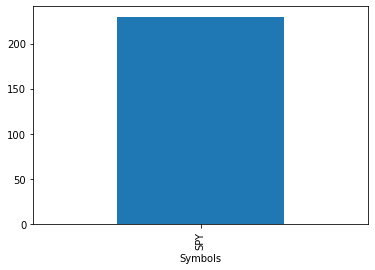

In [39]:
spy_sharp_ratio.plot.bar()

In [40]:
pelosi_spy_df = pd.concat([pelosi_df, spy_df], join="inner", axis=1 )
pelosi_spy_df.head()

Symbols           AAPL        MSFT        NVDA          FB        AMZN  \
Date                                                                     
2021-08-04  146.115219  284.189423  202.602081  358.920013  167.735992   
2021-08-05  146.224579  287.175049  206.229614  362.970001  168.799500   
2021-08-06  145.527512  287.115540  203.521454  363.510010  167.246994   
2021-08-09  145.477722  285.994690  202.811935  361.609985  167.093506   
2021-08-10  144.989792  284.120026  199.224380  361.130005  166.033997   

Symbols              V         DIS         CRM        GOOG        TSLA  \
Date                                                                     
2021-08-04  235.100220  172.580002  244.169998  136.028503  710.919983   
2021-08-05  238.616760  176.710007  250.559998  136.940002  714.630005   
2021-08-06  239.798843  177.130005  250.589996  137.035995  699.099976   
2021-08-09  238.408142  176.720001  249.320007  138.001999  713.760010   
2021-08-10  236.490952  177.070007  243.389999  138.096497  709.989990   

Symbols            SPY  
Date                    
2021-08-04  432.826111  
2021-08-05  435.567139  
2021-08-06  436.286865  
2021-08-09  435.931915  
2021-08-10  436.474213

In [41]:
whitehouse_stocks = pd.read_csv(Path("./Whitehouse_returns.csv"), parse_dates = True, infer_datetime_format = True,)

In [42]:
whitehouse_stocks.head()

Whitehouse Top 10  1 Year Return  1 Year Risk       Sharp
0              NFLX   109610.76330  2832.589674   38.696308
1                FB    68275.10197  1197.655045   57.007318
2              BIIB    61083.79396   708.922332   86.164296
3                 V    54081.48665   189.334786  285.639464
4              APPL    39358.87640   199.111502  197.672540

<AxesSubplot:title={'center':'Whitehouse Sharp Ratio Return'}>

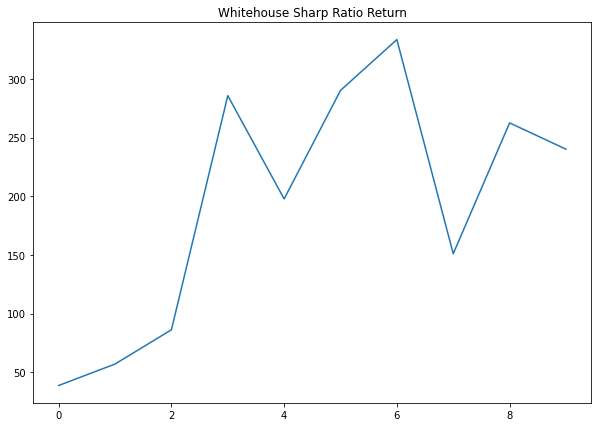

In [43]:
whitehouse_stocks['Sharp'].plot(figsize=(10,7), title = "Whitehouse Sharp Ratio Return")

<AxesSubplot:title={'center':'Whitehouse 1 Year Returns'}>

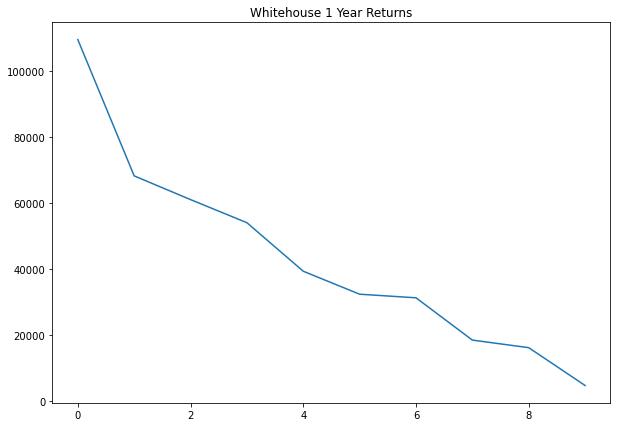

In [44]:
whitehouse_stocks['1 Year Return'].plot(figsize=(10,7), title = "Whitehouse 1 Year Returns")

<AxesSubplot:title={'center':'Whitehosue 1 year Risk'}>

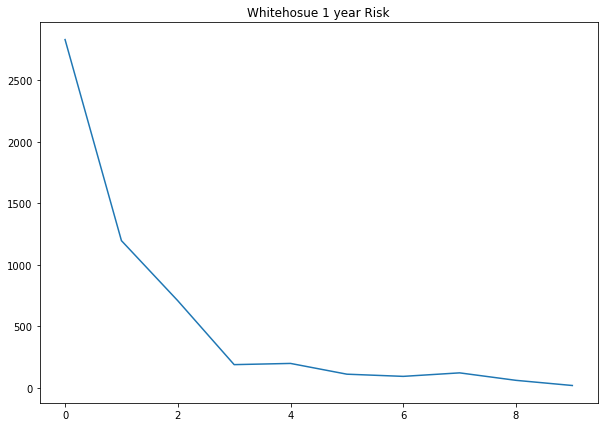

In [45]:
whitehouse_stocks['1 Year Risk'].plot(figsize=(10,7), title = "Whitehosue 1 year Risk")

<AxesSubplot:title={'center':'Whitehouse Fund returns'}, xlabel='Date'>

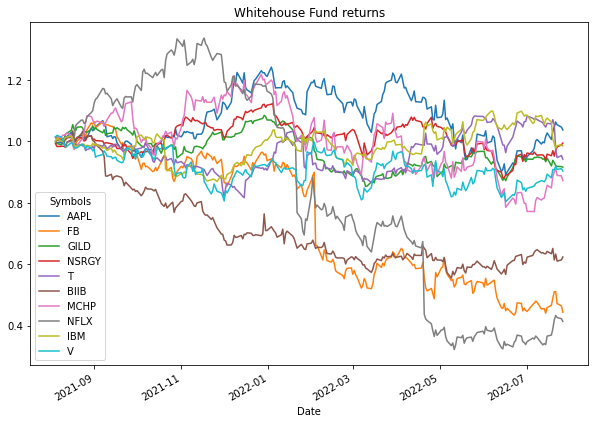

In [117]:
sheldon_cummulative_returns.plot(figsize=(10,7), title = "Whitehouse Fund returns")

In [47]:
pelosi_stocks= pd.read_csv(Path("./Pelosi_returns.csv"), parse_dates = True, infer_datetime_format = True,)

<AxesSubplot:title={'center':'Spy Return'}, xlabel='Date'>

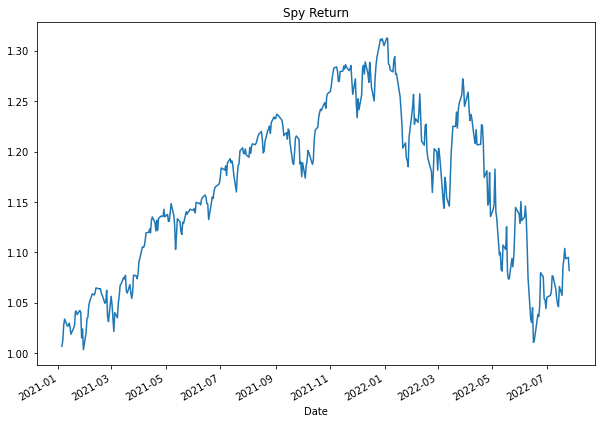

In [48]:
spy_cum_returns['SPY'].plot(figsize=(10,7), title = "Spy Return")

In [49]:
pelosi_funds = pelosi_stocks.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
pelosi_funds

Pelosi Top 10 Holdings  1 year returns  1 year risk       Sharp
0                    APPL        197000.0   442.071723  442.071723
1                    MSFT        371000.0   877.555120  423.018376
2                    NVDA        342000.0  1673.721458  172.104114
3                      FB        342000.0  2679.523428  127.562791
4                    AMZN        191000.0   829.417736  229.781916
5                       V        271000.0   427.918729  632.269554
6                     DIS        181000.0  1004.779032  179.726105
7                     CRM        286000.0  1593.979888  179.645963
8                    GOOG        168000.0   453.983789  369.009559
9                    TSLA       1100000.0  5436.419077  202.597695
10                    NaN             NaN          NaN         NaN

<AxesSubplot:title={'center':'Pelosi Sharp Ratio Return'}>

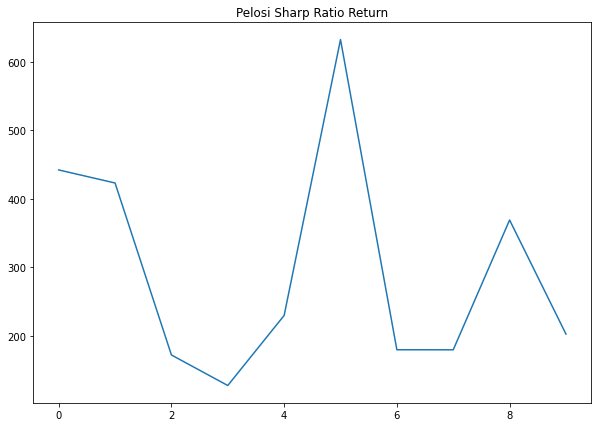

In [50]:
pelosi_funds['Sharp'].plot(figsize=(10,7), title = "Pelosi Sharp Ratio Return")

<AxesSubplot:title={'center':'Pelosi 1 Year Returns'}>

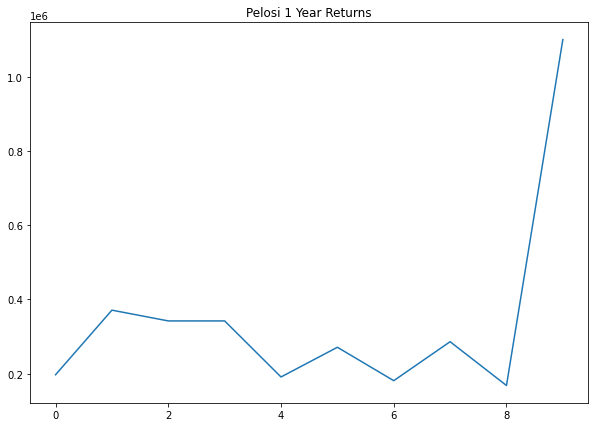

In [51]:
pelosi_funds['1 year returns'].plot(figsize=(10,7), title = "Pelosi 1 Year Returns")

<AxesSubplot:title={'center':'Pelosi 1 year Risk'}>

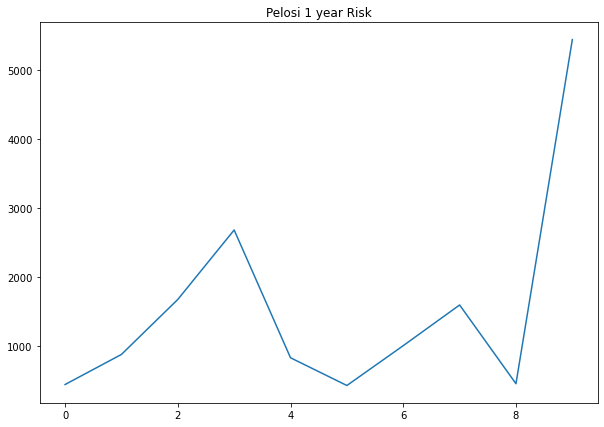

In [52]:
pelosi_funds['1 year risk'].plot(figsize=(10,7), title = "Pelosi 1 year Risk")

<AxesSubplot:title={'center':'Pelosi Fund returns'}, xlabel='Date'>

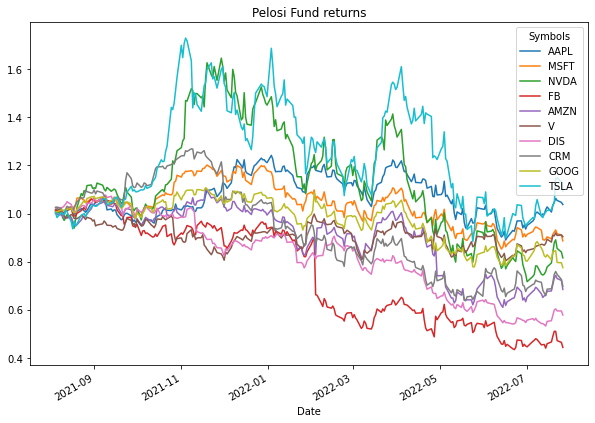

In [53]:
pelosi_cum_returns.plot(figsize=(10,7), title = "Pelosi Fund returns")

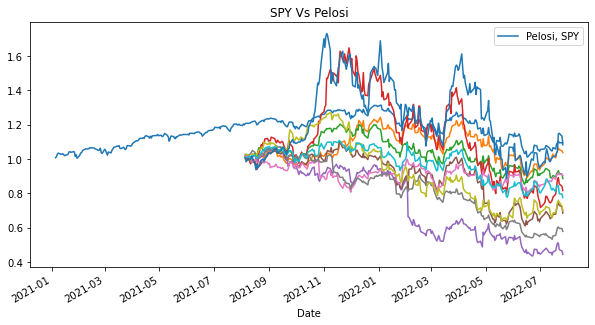

In [54]:
ax = spy_cum_returns.plot(
    legend="True",
    figsize=(10,5),
    title="SPY Vs Pelosi")
pelosi_cum_returns.plot(ax=ax)
ax.legend(["Pelosi, SPY"])

<AxesSubplot:>

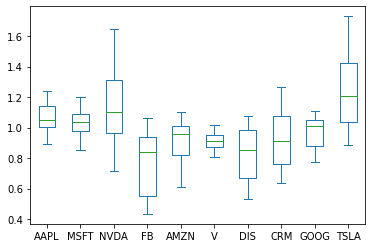

In [55]:
pelosi_cum_returns.plot(kind='box')

<AxesSubplot:>

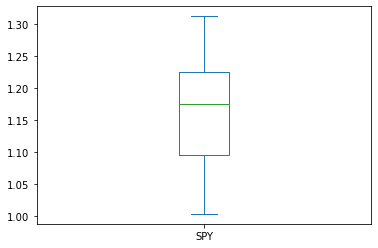

In [56]:
spy_cum_returns.plot(kind='box')

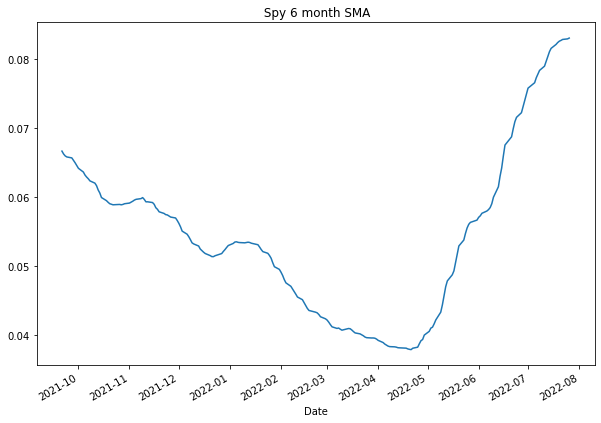

In [57]:
spy_std_180_day_rolling = spy_cum_returns["SPY"].rolling(window=180).std().plot( figsize=(10,7), title = " Spy 6 month SMA")

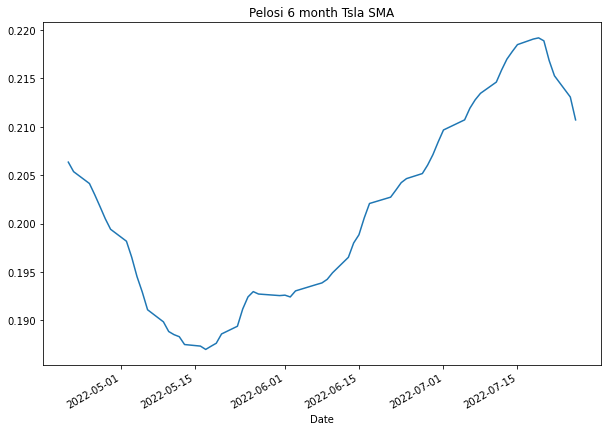

In [58]:
spy_std_365_day_rolling = pelosi_cum_returns["TSLA"].rolling(window=180).std().plot( figsize=(10,7), title = "Pelosi 6 month Tsla SMA")

<AxesSubplot:title={'center':'Pelosi Sharp Ratio'}, xlabel='Symbols'>

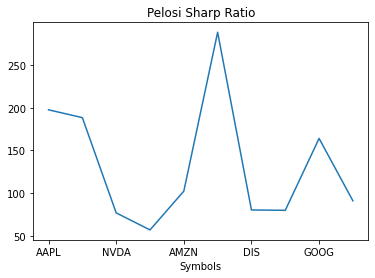

In [59]:
one_year_pelosi_sharpe_ratio = one_year_average_pelosi_return / one_year_pelosi_std
one_year_pelosi_sharpe_ratio.plot( title = "Pelosi Sharp Ratio")

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

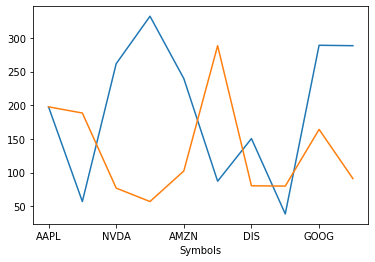

In [60]:
one_year_sheldon_sharpe_ratio.plot() + one_year_pelosi_sharpe_ratio.plot()

<AxesSubplot:title={'center':' Pelosi Covariance for APPLE'}, xlabel='Date'>

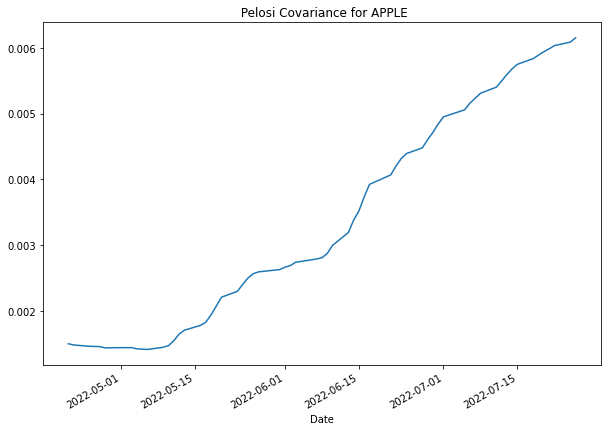

In [61]:
pelosi_rolling_180_covariance = pelosi_cum_returns['AAPL'].rolling(window=180).cov(spy_cum_returns['SPY'])
pelosi_rolling_180_covariance.plot(figsize=(10,7), title= " Pelosi Covariance for APPLE")

<AxesSubplot:title={'center':' Pelosi Covariance for TSLA'}, xlabel='Date'>

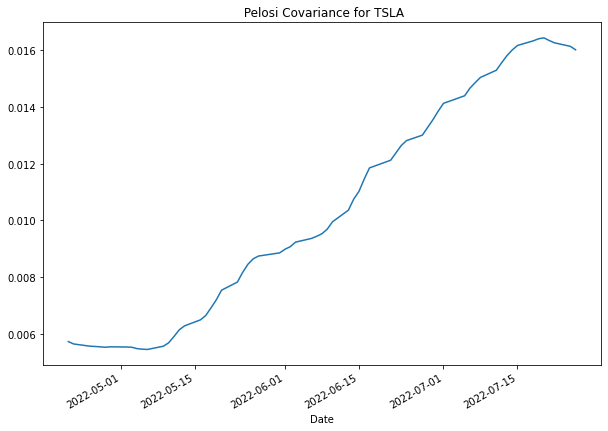

In [62]:
pelosi_rolling_180_covariance = pelosi_cum_returns['TSLA'].rolling(window=180).cov(spy_cum_returns['SPY'])
pelosi_rolling_180_covariance.plot(figsize=(10,7), title= " Pelosi Covariance for TSLA")

In [109]:
sheldon_gild_beta = sheldon_cummulative_returns['GILD'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
sheldon_gild_beta

0.357242064802019

In [110]:
sheldon_nsrgy_beta = sheldon_cummulative_returns['NSRGY'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
sheldon_nsrgy_beta

0.44693116498136864

In [111]:
sheldon_ibm_beta = sheldon_cummulative_returns['IBM'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
sheldon_ibm_beta

-0.3798652452710092

In [112]:
sheldon_t_beta = sheldon_cummulative_returns['T'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
sheldon_t_beta

-0.4559502849601449

<AxesSubplot:title={'center':' Whitehouse Covariance for APPLE'}, xlabel='Date'>

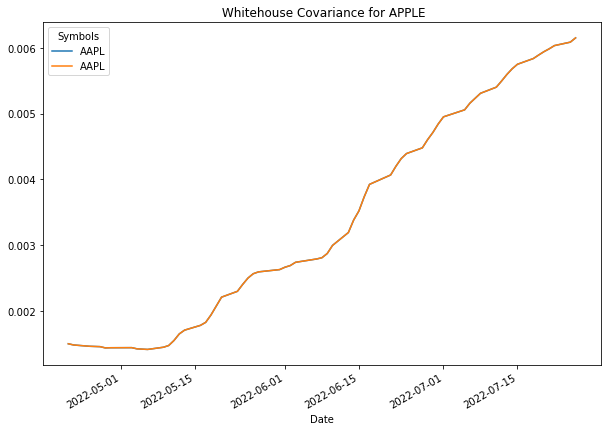

In [91]:
sheldon_rolling_180_covariance = sheldon_cummulative_returns['AAPL'].rolling(window=180).cov(spy_cum_returns['SPY'])
sheldon_rolling_180_covariance.plot(figsize=(10,7), title= " Whitehouse Covariance for APPLE")

In [92]:
pelosi_aapl_beta = pelosi_cum_returns['AAPL'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_aapl_beta


0.6449968437035946

In [93]:
pelosi_goog_beta = pelosi_cum_returns['GOOG'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_goog_beta


1.0059487182651579

In [94]:
pelosi_v_beta = pelosi_cum_returns['V'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_v_beta


0.2633263110709444

In [95]:
pelosi_msft_beta = pelosi_cum_returns['MSFT'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_msft_beta

0.9429177275626911

In [96]:
pelosi_tsla_beta = pelosi_cum_returns['TSLA'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_tsla_beta


1.84526804713602

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

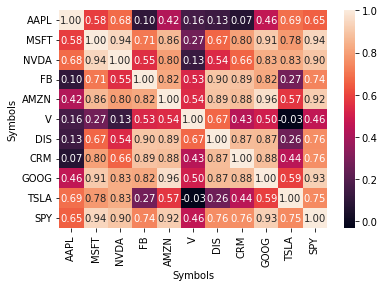

In [97]:
pelosi_spy_cumulative_returns = pd.concat([pelosi_cum_returns, spy_cum_returns], axis=1)

sns.heatmap(pelosi_spy_cumulative_returns.corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

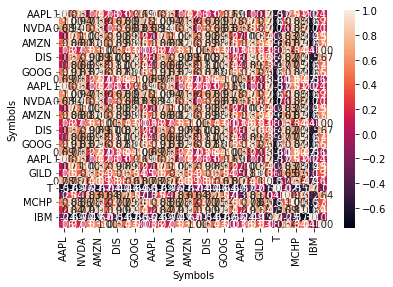

In [98]:
sheldon_cummulative_returns = pd.concat([pelosi_cum_returns, sheldon_cummulative_returns], axis=1)

sns.heatmap(sheldon_cummulative_returns.corr(), annot=True, fmt='.2f')

<AxesSubplot:title={'center':'SPY Probability Distribution'}, ylabel='Density'>

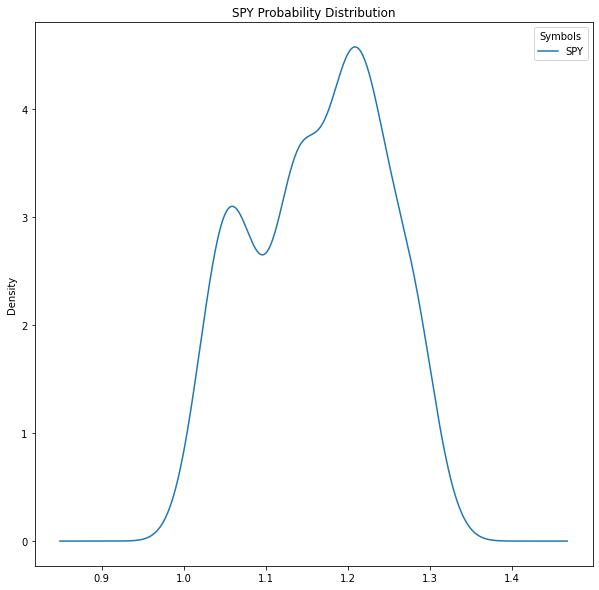

In [99]:
spy_cum_returns.plot.density(figsize=(10,10), title = "SPY Probability Distribution")

<AxesSubplot:title={'center':'Whitehouse Probability Distribution'}, ylabel='Density'>

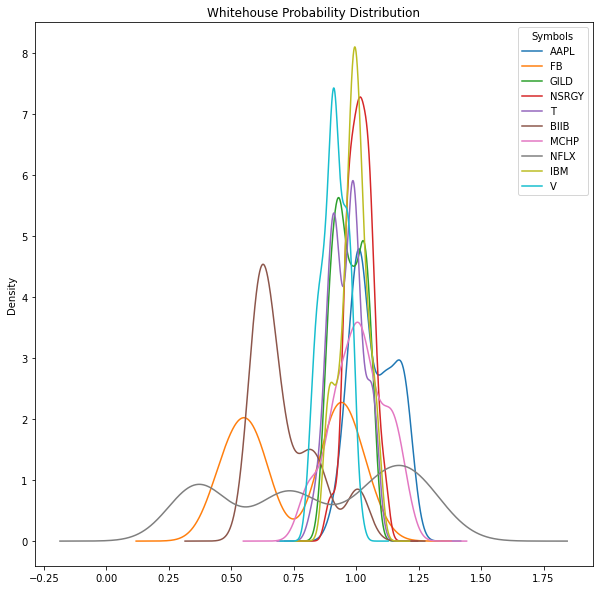

In [118]:
sheldon_cummulative_returns.plot.density(figsize=(10,10), title = "Whitehouse Probability Distribution")

<AxesSubplot:title={'center':'Pelosi Probability Distribution'}, ylabel='Density'>

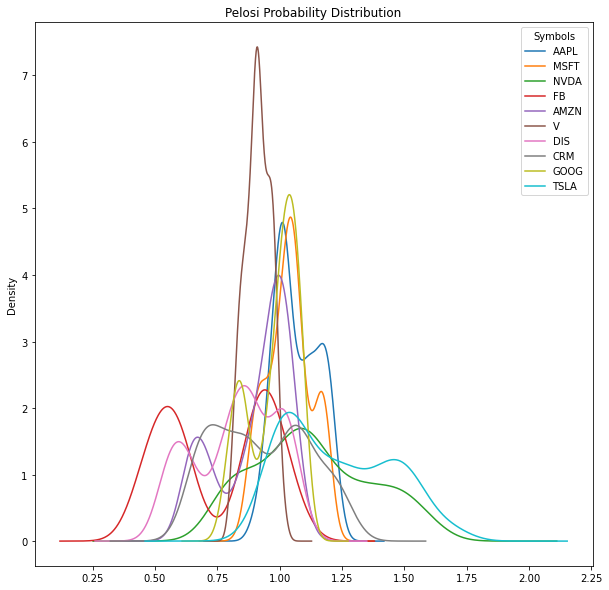

In [101]:
#Run analysis for new portfolio
pelosi_cum_returns.plot.density(figsize=(10,10), title = "Pelosi Probability Distribution")

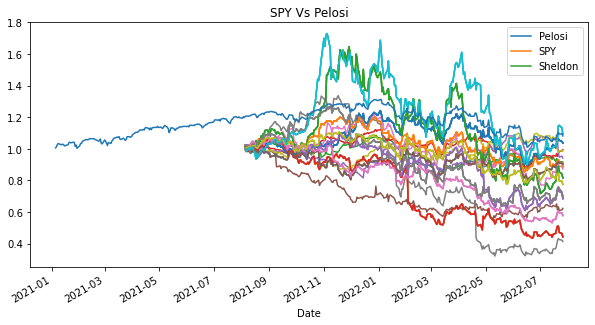

In [102]:
ax = sheldon_cummulative_returns.plot(
    legend="True",
    figsize=(10,5),
    title="SPY Vs Pelosi")
pelosi_cum_returns.plot(ax=ax)
spy_cum_returns.plot(ax=ax)

ax.legend(["Pelosi","SPY", "Sheldon"])

In [108]:
pelosi_monte = pelosi_funds['1 year returns'].montecarlo(sims=1000, bust=-0.1, goal=1)






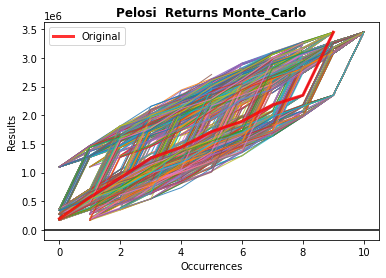

In [81]:
pelosi_monte.plot(title="Pelosi  Returns Monte_Carlo")

In [82]:
print(pelosi_monte.stats)

{'min': 3449000.0, 'max': 3449000.0, 'mean': 3449000.0, 'median': 3449000.0, 'std': 0.0, 'maxdd': nan, 'bust': 0.0, 'goal': 0.919}


In [83]:
sheldon_monte = whitehouse_stocks['1 Year Return'].montecarlo(sims=1000, bust=-0.1, goal=1)

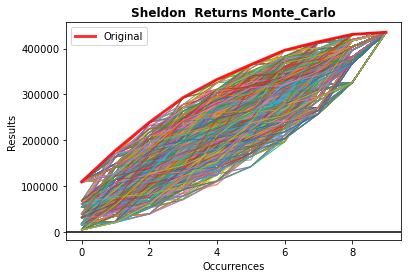

In [84]:
sheldon_monte.plot(title="Sheldon  Returns Monte_Carlo")

In [85]:
print(sheldon_monte.stats)

{'min': 435471.01931599993, 'max': 435471.0193160001, 'mean': 435471.0193160036, 'median': 435471.019316, 'std': 3.605649173729041e-09, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}


In [113]:
print("FINAL REPORT")
print("Sharpe Ratio:")
print(f"Pelosi's 1 Year Sharpe Ratio: {one_year_pelosi_sharpe_ratio.sum() / 10}")
print(f"Sheldon's 1 Year Sharpe Ratio: {one_year_sheldon_sharpe_ratio.sum() / 10}")
print(f"SPY's 1 Year Sharpe Ratio: {spy_sharp_ratio.sum()}")
print("Standard Deviation:")
print(f"Pelosi's STD: {one_year_pelosi_std.sum() / 10}")
print(f"Sheldon's STD: {one_year_sheldon_std.sum() / 10}")
print(f"SPY STD: {one_year_spy_std.sum()}")
if one_year_pelosi_sharpe_ratio.sum() / 10 > spy_sharp_ratio.sum():
    print("Pelosi's portfolio has a better Risk/Return ratio than the SPY"),
else:
    print("SPY has a better Risk/Return ratio than Pelosi's portfolio")
if one_year_pelosi_std.sum() / 10 > one_year_spy_std.sum():
    print("Pelosi's stock portfolio is more volatile than the SPY")
else:
    print("SPY is more volatile than Pelosi's stock portfolio")
if one_year_sheldon_sharpe_ratio.sum() / 10 > spy_sharp_ratio.sum():
    print("Sheldon's portfolio has a better Risk/Return ratio than the SPY"),
else:
    print("SPY has a better Risk/Return ratio than Sheldon's portfolio")
if one_year_sheldon_std.sum() / 10 > one_year_spy_std.sum():
    print("Sheldon's stock portfolio is more volatile than the SPY")
else:
    print("SPY is more volatile than Sheldon's stock portfolio")
if one_year_pelosi_sharpe_ratio.sum() / 10 > one_year_sheldon_sharpe_ratio.sum() / 10:
    print("Pelosi's portfolio has a better Risk/Return ratio than Sheldon's")
else:
    print("Sheldon's portfolio has a better Risk/Return ratio than Pelosi's")
if one_year_pelosi_std.sum() / 10 > one_year_sheldon_std.sum() / 10:
    print("Pelosi's portfolio is more volatile than Sheldon's")
else:
    print("Sheldon's portfolio is more volatile than Pelosi's")
if one_year_pelosi_std.sum() / 10 > one_year_sheldon_std.sum() / 10 and one_year_pelosi_std.sum() / 10 > one_year_spy_std.sum():
    print("Pelosi has the most volatile portfolio")
if spy_sharp_ratio.sum() > one_year_pelosi_sharpe_ratio.sum() / 10 and spy_sharp_ratio.sum() > one_year_sheldon_sharpe_ratio.sum() / 10:
    print("SPY has the best Risk/Return Ratio")
if one_year_sheldon_sharpe_ratio.sum() / 10 > one_year_pelosi_sharpe_ratio.sum() / 10:
    print("Republicans win, Sheldon has a better Risk/Return than Pelosi")
    print("BUT, even Sheldon couldn't beat the market. SPY had the best overall Risk/Return")

FINAL REPORT
Sharpe Ratio:
Pelosi's 1 Year Sharpe Ratio: 132.54875755658244
Sheldon's 1 Year Sharpe Ratio: 194.1116309404675
SPY's 1 Year Sharpe Ratio: 229.8465281080283
Standard Deviation:
Pelosi's STD: 689.7744522207098
Sheldon's STD: 553.5448883896931
SPY STD: 460.69088506301614
SPY has a better Risk/Return ratio than Pelosi's portfolio
Pelosi's stock portfolio is more volatile than the SPY
SPY has a better Risk/Return ratio than Sheldon's portfolio
Sheldon's stock portfolio is more volatile than the SPY
Sheldon's portfolio has a better Risk/Return ratio than Pelosi's
Pelosi's portfolio is more volatile than Sheldon's
Pelosi has the most volatile portfolio
SPY has the best Risk/Return Ratio
Republicans win, Sheldon has a better Risk/Return than Pelosi
BUT, even Sheldon couldn't beat the market. SPY had the best overall Risk/Return
